In [ ]:
#Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

In [ ]:
#1. Read the column description and ensure you understand each attribute well


#2. Study the data distribution in each attribute, share your findings. (10 points)


#3. Get the target column distribution. 


#4. Split the data into training and test set in the ratio of 70:30 respectively


#5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
#liability customer buying personal loans (30 points)


#6. Print the confusion matrix for all the above models (10 points)


#7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)


In [1]:
import pandas as pd #import all necessary 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score


In [2]:
Bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')# read the dataset from the csv file

In [3]:
Bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
Bank_df.info() #5000 records with 14 features are available for this dataset.
# all are non null columns with 1 float and rest all are integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
Bank_df['CCAvg']=Bank_df['CCAvg'].astype(float).astype(int)

In [7]:
Bank_df.dtypes

ID                    int64
Age                   int64
Experience            int64
Income                int64
ZIP Code              int64
Family                int64
CCAvg                 int32
Education             int64
Mortgage              int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
dtype: object

In [8]:
Bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.5138,1.741728,0.0,0.00,1.0,2.00,10.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0


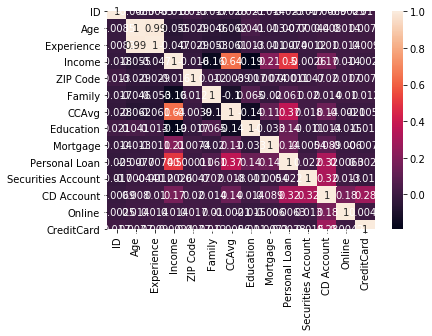

In [11]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

sns.heatmap(Bank_df.corr(), annot=True) # Age and experience have strong positive correlation

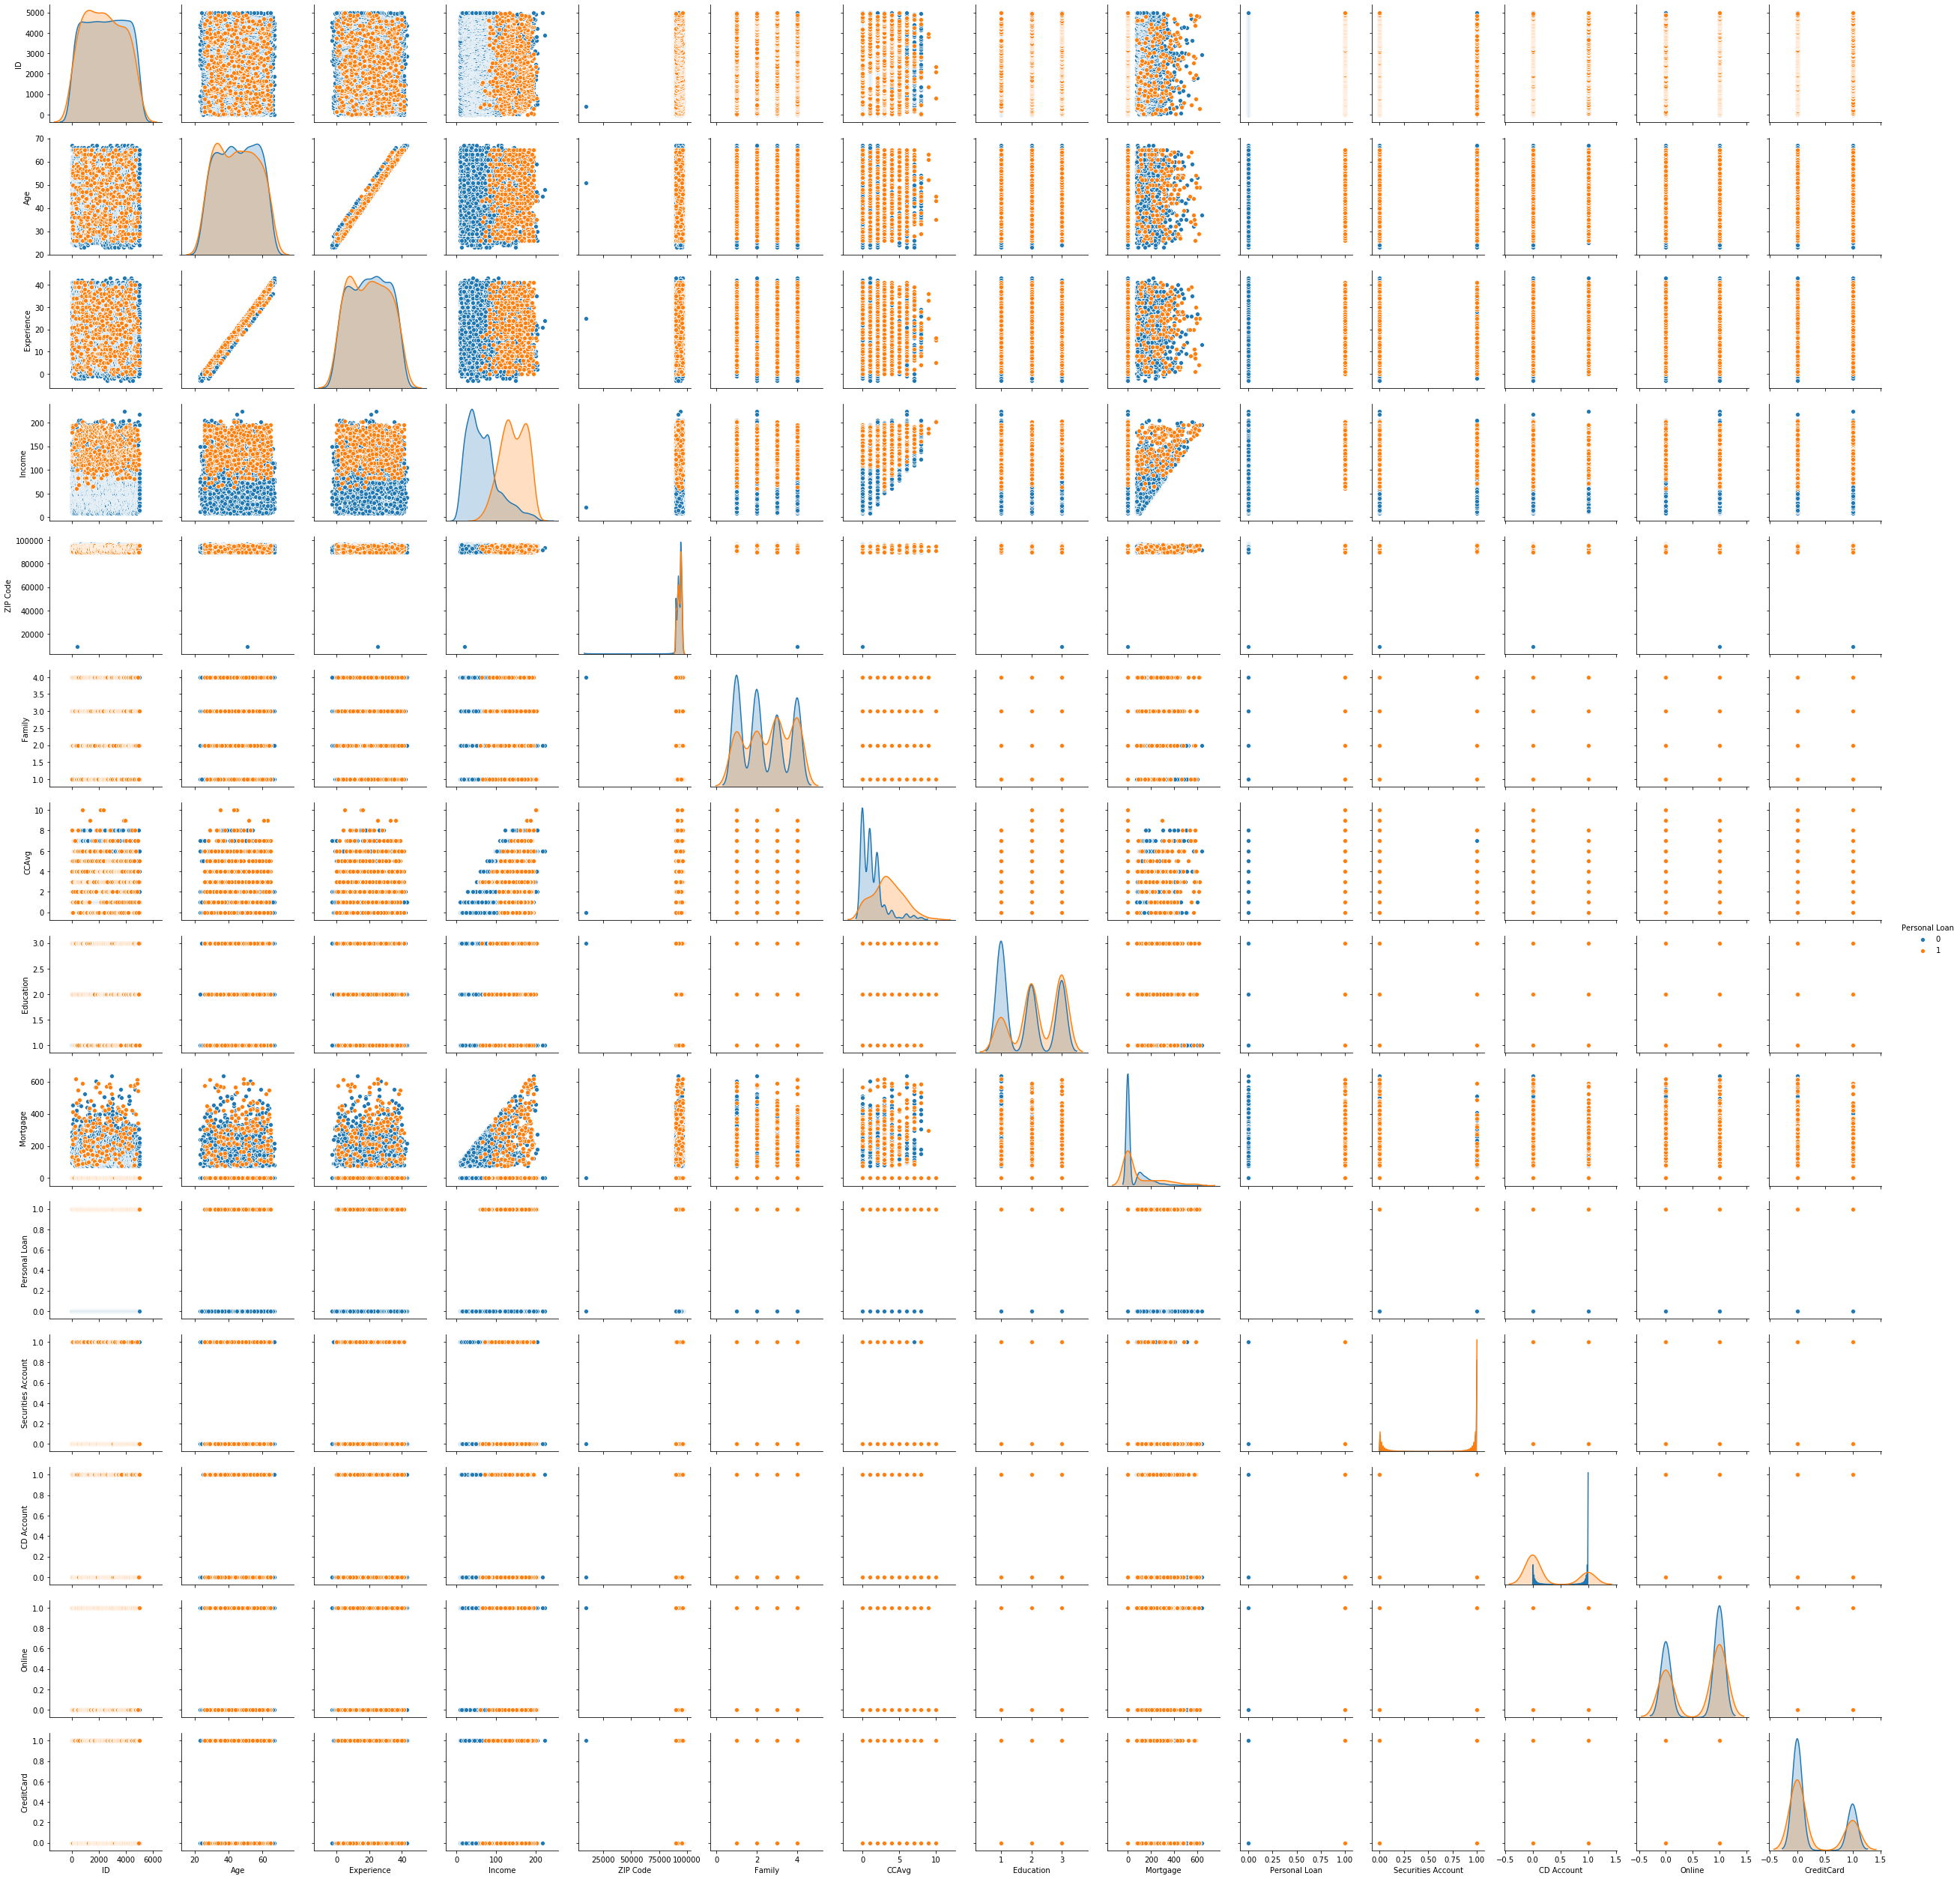

In [13]:
import seaborn as sns
sns.pairplot(Bank_df,diag_kind='kde',hue='Personal Loan')

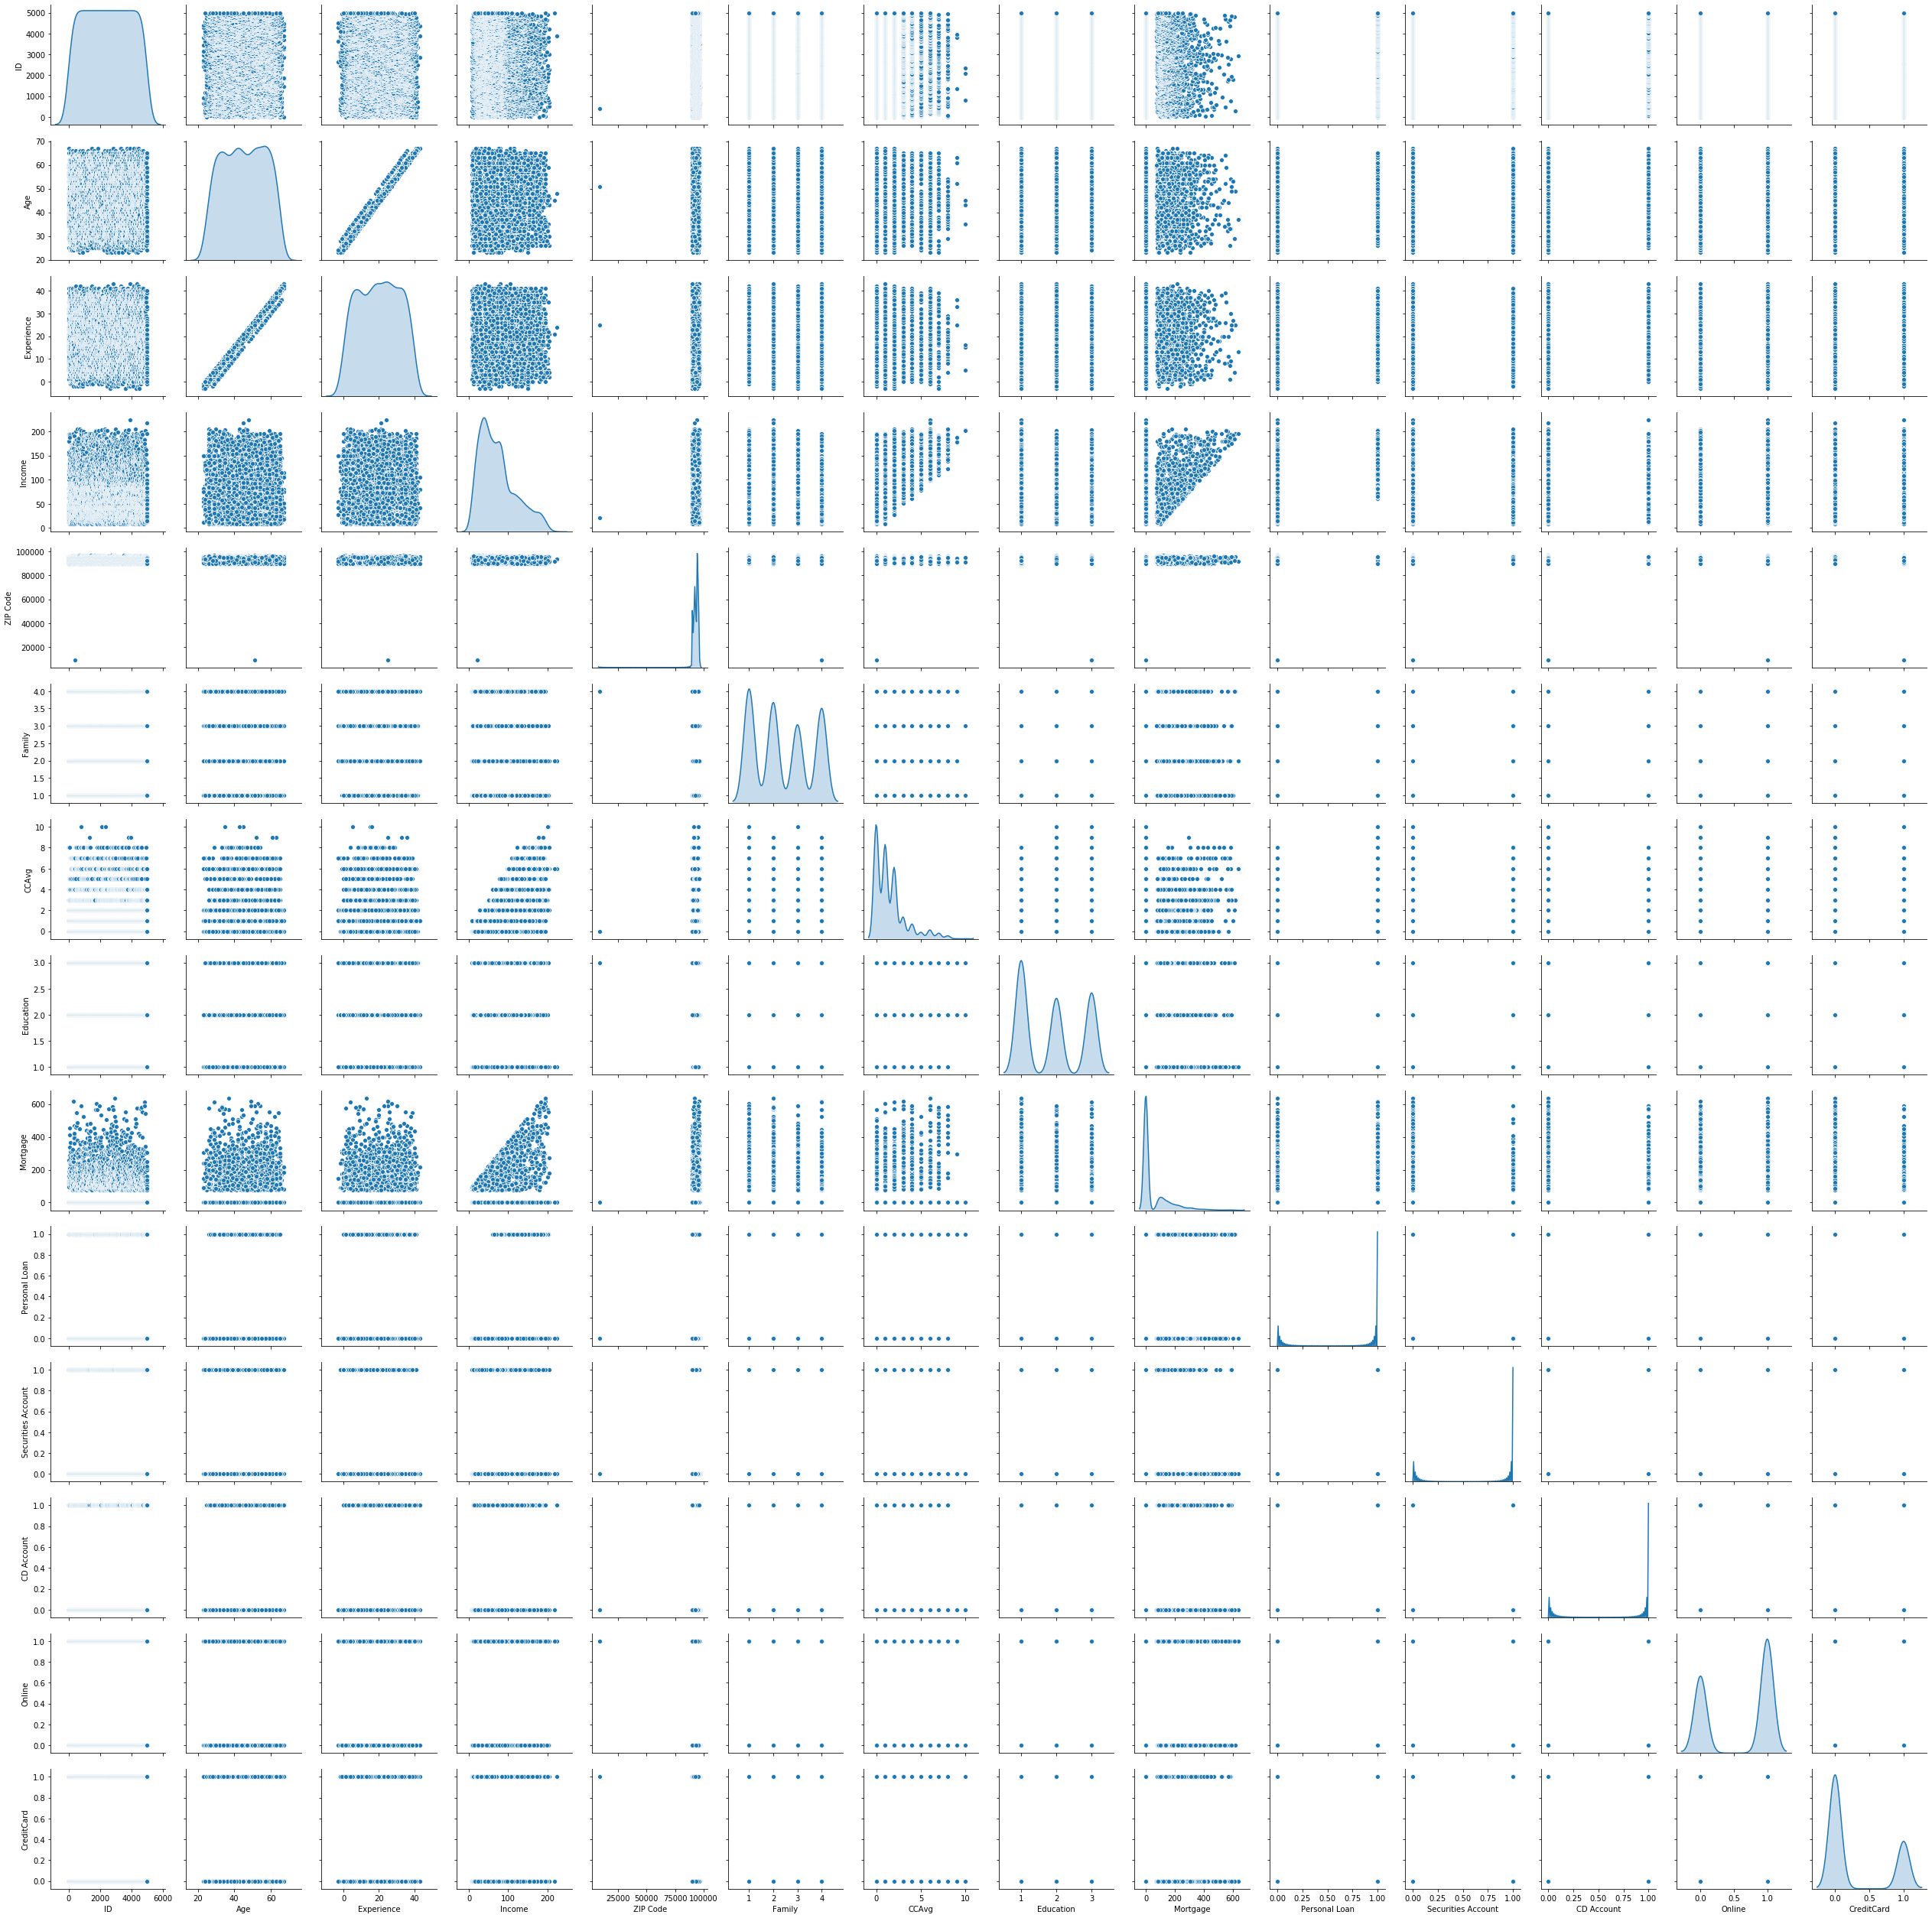

In [14]:
import seaborn as sns
sns.pairplot(Bank_df,diag_kind='kde')

In [ ]:
#Right skewness interms of income, mortage,CCAvg
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship

In [15]:
Bank_df['Personal Loan'].value_counts() #Personal loan is the target column 

#count. 1 - taken Personal loan in past campaign.
0 - not taken loan.

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
Bank_df[Bank_df.Experience<0].Experience.count() #Experience is observed as negative for some of the records.

52

In [17]:
Bank_df[Bank_df['Experience']>=0].count()

ID                    4948
Age                   4948
Experience            4948
Income                4948
ZIP Code              4948
Family                4948
CCAvg                 4948
Education             4948
Mortgage              4948
Personal Loan         4948
Securities Account    4948
CD Account            4948
Online                4948
CreditCard            4948
dtype: int64

In [18]:
Bank_df['Experience']=Bank_df['Experience'].abs()

In [19]:
Bank_df[Bank_df['Experience']>=0].count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

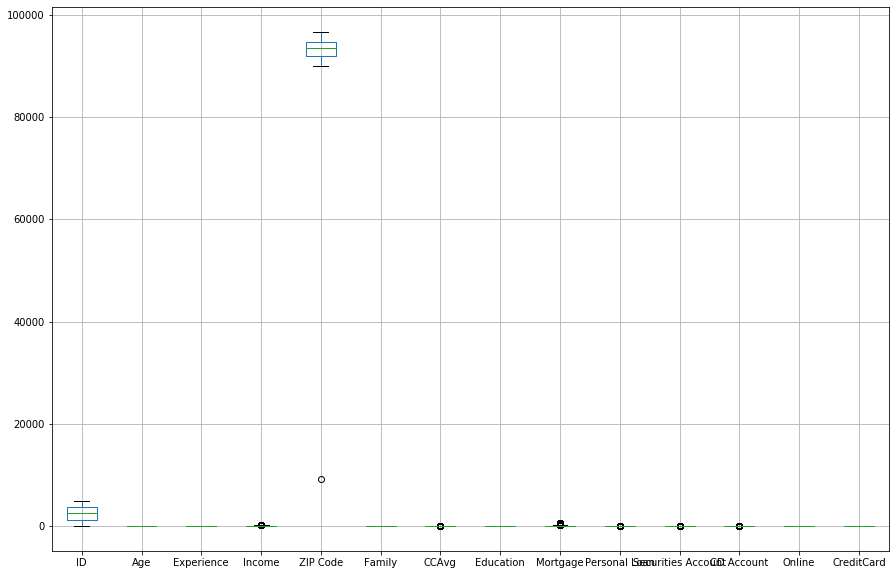

In [47]:

Bank_df.boxplot(figsize=(15,10))

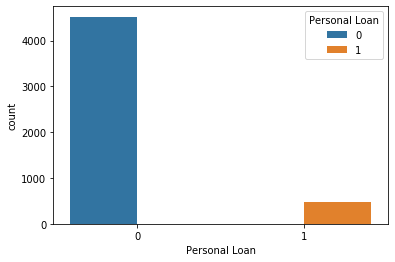

In [35]:
# Count of target column
sns.countplot(Bank_df['Personal Loan'],hue=Bank_df['Personal Loan'])

In [48]:
 Bank_df.groupby(["Personal Loan"]).count() 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [50]:
# Copy all the independent variables into X dataframe. 
# Copy the 'Personal loan' column alone into the y dataframe. This is the dependent variable
df=Bank_df
X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']


In [52]:
features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values

from sklearn import model_selection
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [53]:
#  logistic regression to predict the personal loan affinity - 
# considered only 11 columns 1:10 which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9153333333333333
[[1332   30]
 [  97   41]]


In [54]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.58      0.30      0.39       138

    accuracy                           0.92      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.90      0.92      0.90      1500



In [55]:
# Invoking the NB Gaussian function to create the model #Naive Bayes
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))


[[1271   91]
 [  54   84]]


In [57]:
 # make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1362
           1       0.48      0.61      0.54       138

    accuracy                           0.90      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.92      0.90      0.91      1500



In [58]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [59]:
predicted_labels = NNH.predict(X_test)

In [60]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1340   22]
 [ 125   13]]


In [61]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1362
           1       0.37      0.09      0.15       138

    accuracy                           0.90      1500
   macro avg       0.64      0.54      0.55      1500
weighted avg       0.86      0.90      0.87      1500



In [62]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [63]:
predicted_labels = NNH.predict(X_test_scaled)

In [64]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1356    6]
 [  58   80]]


In [65]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.93      0.58      0.71       138

    accuracy                           0.96      1500
   macro avg       0.94      0.79      0.85      1500
weighted avg       0.96      0.96      0.95      1500



In [ ]:
#KNN is the best model for in this case which performs better

KNN: 0.900000 (0.015388)
NB: 0.885000 (0.009808)
LR: 0.907200 (0.007600)


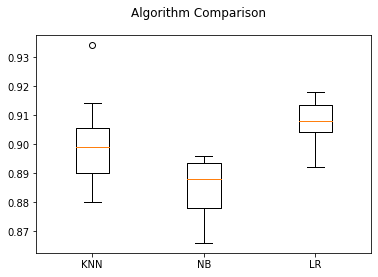

In [67]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_df, y_df, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()